
---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---





---
<big><big><big><big><big>Nawet więcej o drzewach</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [18]:
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import csv

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [4]:
output_notebook()
sns.set(font_scale=2.0)

Loading BokehJS ...

Image inclusion
<img src="../mum_figures/" width="100%">

# Tworzenie testów
1. zmienne ciągłe
  1. uporządkować występujące przykłady w kolejności rosnącej
  2. znaleźć najlepszy podział (information gain, inne)
    * podział __w środku__ w obszarze pustym między różnymi wartosciami
    * podział sąsiadujących zmiennych z tej samej klasy __nie zmienia__ information gain
2. zmienne dyskretne __uporządkowane__
  * analogicznie do ciągłych
3. dyskretne __nie uporządkowane__
  * podział na K wartości
    1. znaleźć wszystkie dostępne K wartości
    2. podzielić na K podzbiorów i odpowiadających im poddrzew
    * podział na K wartości  __szybko__ dzieli zbiór
      * bardzo osłabia generalizację
      * niektóre wartości mogą __nie wystąpić__ w zbiorze rzeczywistych przykładów
        * i na __odwrót__...!
  * podział binarny
    1. posortować przykłady wartości atrybutów według __malejącej__ proporcji przykładów z klas mających tą wartość atrybutu
    2. wyszukać optymalny podział jak w przypadku ciągłym

# Extremely Randomized Trees Forest (Extra Trees Forest)
1. podobnie jak w drzewach losowych wybierany podzbiór cech
2. __tylko kilka__ losowych progów jest __losowanych__
  * spośród nich wybierany najlepszy
3. redukuje wariancję kosztem biasu
4. porównywalne wyniki do Random Forest
  * słabszy gdy wiele cech oraz szum
  * sporo szybszy

# Boosting drzew
1. drzewa $$T(x,\theta)=\sum_{j=1}^J\gamma_j I(x\in R_j)$$ gdzie
  * $R_j$: końcowym obszar odpowiadający $j$-temu liściu w drzewie,
  * $\gamma_j$: wartość funkcji w $j$-tym liściu
  * drzewa budujemy w dwóch krokach
  $$\widehat{\theta} =\underset{\theta}{\arg\min}\sum_{j=1}^J\sum_{x_i\in R_j}L(y_i, \gamma_j)$$
      * szukanie $R_j$ algorytmem zachłannym i optymalizacja $\gamma_j$
    
2. w boostingu budować __wzmocnione__ (boosted) drzewa jako __sumę__ indywidualnych drzew $$f_K(x)=\sum_{k=1}^KT(x; \theta_k)$$
  * proces __krokowego modelu addytywnego__ optymalizując 
  $$\widehat{\theta}{_k}=\underset{\theta_k}{\arg\min}\sum_{i=1}^NL(y_i, f_{k-1}(x_i)+T(x_i,\theta_k))$$
  * dla $R_{jk}$ wartość 
  $$\widehat{\gamma}_{jk}=\underset{\gamma_{jk}}{\arg\min}\sum_{x_i\in R_{jk}}L(y_i, f_{k-1}(x_i)+\gamma_{jk})$$
3. $T_k()$ __minimalizuje błędy modelu zbudowanego do tego momentu__
    * dla średniokwadratowego
      * $T_k()$ przewiduje błędy $y_i+f_{k-1}(x_i)$
        * $\gamma_{jk}$ średnią dla $R_j$
    * dla błędu eksponencjalnego i problemów binarnych
      * rozwiązanie odpowiada Adaboost
      * rozwiązanie drzewem $\beta_kT(x;\theta_k)$
      * drzewo minimalizuje błąd $\sum_{i=1}^Nw_i^{(k)}I(y_i\neq T(x_i,\theta_k))$
    * użycie funkcji odpornej na outliers daje zwykle dość złożony algorytm poszukiwania obszarów
4. w podejściu krokowym
  * algorytm zakłada węzeł jako ostatni
  * skutkuje zbyt dużymi drzewami

# Extreme Gradient Boosting XGBoost
1. model addytywny
$$\widehat{y}_i=\sum_{k=1}^Kf_k(x_i)$$
2. xgboost uwzględnia __regularyzację__
$$L(\theta)=\sum_il(y_i, \widehat{y}_i)+\sum_k\Omega(f_k),$$
dla kosztu regularyzacji
$$\Omega(f)=\gamma{}T+\frac{1}{2}\lambda\|w\|^2$$
gdzie $w$ wektorem __wag__ związanych z liśćmi
  * wagi modyfikują __istotność__ liści (istotność odpowiedzi)
  * drzewa decyzyjne __nie__ uwzględniają regularyzacji
    * tylko maksymalizacja _czystości_ węzłów
  * las losowy stosuje regularyzację przez losowanie atrybutów
  * czasem także dodatkowy składnik regularyzacji $\alpha\|w\|_1$

3. xgboost to model addytywny: 
  1. w kroku dodaje $f_k$
  2. $f_k$ minimalizuje koszt (loss) dotychczasowego modelu $l(y-\widehat{y}_{(k-1)})$
  $$L(k)=\sum_il(y_i, \widehat{y}_{(k-1)}+f_{k}(x_i))+\Omega(f_k)$$
  * drzewo $f_k$ dodawane __zachłannie__: takie, które w __najbardziej__ poprawia koszt $L()$

4. xgboost wykorzystuje rozwinięcie $l()$ w szereg Taylora ze wzgledu na $\widehat{y}_{(k-1)}$
$$\begin{align}
l(y, \widehat{y}_{(k-1)}+f_k(x_i))=&\;\;l(y, \widehat{y}_{(k-1)})\\
&+\frac{\partial}{\partial \widehat{y}_{(k-1)}}l(y, \widehat{y}_{(k-1)})
(\widehat{y}_{(k-1)}+f_k(x_i)-\widehat{y}_{(k-1)})\\
&+\frac{1}{2}\frac{\partial^2}{\partial \widehat{y}_{(k-1)}}l(y, \widehat{y}_{(k-1)})(\widehat{y}_{(k-1)}+f_k(x_i)-\widehat{y}_{(k-1)})^2+O(3)\\
&\simeq l(y, \widehat{y}_{(k-1)})+\frac{\partial}{\partial \widehat{y}_{(k-1)}}l(y, \widehat{y}_{(k-1)})f_k(x_i)+\frac{1}{2}\frac{\partial^2}{\partial \widehat{y}_{(k-1)}}l(y, \widehat{y}_{(k-1)})f_k(x_i)^2
\end{align}$$

5. opuszczając elementy powyżej drugiego rzędu
$$L(k)\simeq\sum_il(y, \widehat{y}_{(k-1)})+g(x_i)f_k(x_i)+\frac{1}{2}h(x_i)f_k(x_i)^2 +\Omega(f_k)$$
6. metoda jest 
  * __boostingiem__ buduje klasyfikatory poprawiające wyniki
  * __addytywnym__ modyfikuje funkcję
  * __gradientowym__ za każdym razem optymalizuje funkcję szukając minimum

7. optymalizując w __k-tym kroku__ opuszczamy elementy stałe (wartość $l(y_i,\widehat{y}_{(k-1)})$ z poprzedniego kroku) i porządkujemy
$$\begin{align}
\bar{L}(k)&=\sum_i g(x_i) f_k(x_i)+\frac{1}{2}h(x_i)f_k(x_i)^2 +\overbrace{\gamma{}T+ \frac{1}{2}\lambda\sum_j^Tw_j^2}^{regularyzacja}\\
&\text{niech $w_j$ będzie średnią wartością $f_k$ dla $x_i\in I_j$}\\
&=\sum_j^T\left[\left(\sum_{x_i\in I_j}g(x_i)\right)w_j
+\frac{1}{2}\left(\sum_{x_i\in{}I_j}h(x_i)+\lambda\right)w_j^2\right]+\gamma{}T
\end{align}$$
  * widać jak wpływają na koszt $g(x_i)$, $h(x_i)$, $w_j$, $w_j^2$
  * dla __ustalonej__ struktury liści można wyliczyć optymalne wagi
  
  $$w_j^\ast=-\frac{\sum_{x_i\in{}I_j} g(x_i)}{\sum_{x_i\in{}I_j}h(x_i)+\lambda}$$
  <img src="../mum_figures/xgboost-tree.png" width="100%"/>
    * wartość kosztu $\bar{L}(f)$ pozwala wybrać drzewo podobnie do _impurity_ w drzewach decyzyjnych
8. algorytm musi przeszukać __dużą__ klasę drzew
  * niemożliwe przeglądnięcie wszystkich
  * podejście zachłanne
    * rozpoczynamy od drzewa z pojedynczego węzła
    * dodaje nowe gałęzie wybierając optymalny ze względu na $\bar{L}()$ podział
9. podział przez maksymalizację
$$Gain=\frac{G_l^2}{H_L}+\frac{G^2_R}{H_R}-\frac{G^2_{ij}}{H_{ij}}$$
    
7. XGBoost
  * wielokrotnie wykorzystany jako zwycięski algorytm w wielu konkursach
  * dostępny jako biblioteka
  * szereg interfejsów
  * bardzo szybki
  * wykorzystuje rzadkie dane
  * potrafi douczać się najlepszych wartości zastępczych dla brakujących atrybutów
  * jaki model addytywny daje __gładszą__ powierzchnię błędu

# Istotność zmiennych wyjaśniających
* dla pojedynczych drzew Breiman zaproponował miarę istotności zmiennej $p$ 
$$Imp^2(p;T)=\sum_{t=1}^{J-1}g_t^2 I(v(t)=p)$$
  * suma po wszystkich $J-1$ węzłach wewnętrznych
  * dla każdego wewnętrznego węzła jest wybierana zmienna $X_{v(t)}$ powodująca największy zysk w postaci __redukcji błędu__ $g$ wynikającej z podziału węzła
  * w efekcie $Imp(p;T)$ jest sumą zysków wynikających z wyboru zmiennej wyjaśniającej $X_p$
  * miarę skalujemy tak, by największa istotność miała ustaloną wartość, np. 100
  
  
* dla komitetu drzew miarę można rozszerzyć jako
$$Imp^2(p)=\frac{1}{K}\sum_{k=1}^K Imp^2(p;T_k)$$

In [35]:
def importance(n_estimators = 30):
    df = pd.read_csv('breast-cancer-wisconsin.tab', sep='\t')
    data = df.values
    n = 3
    X = data[3:, :-1]
    y = data[3:, -1]
    names = ['clump', 'cell size', 'cell shape', 'marginal adh', 
             'single cell size', 'bare nuclei', 'bland', 'normal nuclei', 'mitoses']
    fig, ax = plt.subplots(1, 3, figsize=(18,14))
    ensemble_name = ('ExtraTreesForest', 'RandomTreesForest', 'GradientBoosting')
    for k, forest in enumerate([ExtraTreesClassifier(n_estimators=n_estimators, 
                                                    random_state=0),
                               RandomForestClassifier(n_estimators=n_estimators, 
                                                      random_state=0),
                               GradientBoostingClassifier(n_estimators=n_estimators)]):
        forest.fit(X, y)
        imp = forest.feature_importances_
        ind = np.argsort(imp)[::-1]
        ax[k].set_title(ensemble_name[k])
        sns.barplot(imp[ind], range(X.shape[1]), hue=[names[i] for i in ind], 
                    ax=ax[k])
    fig.tight_layout()

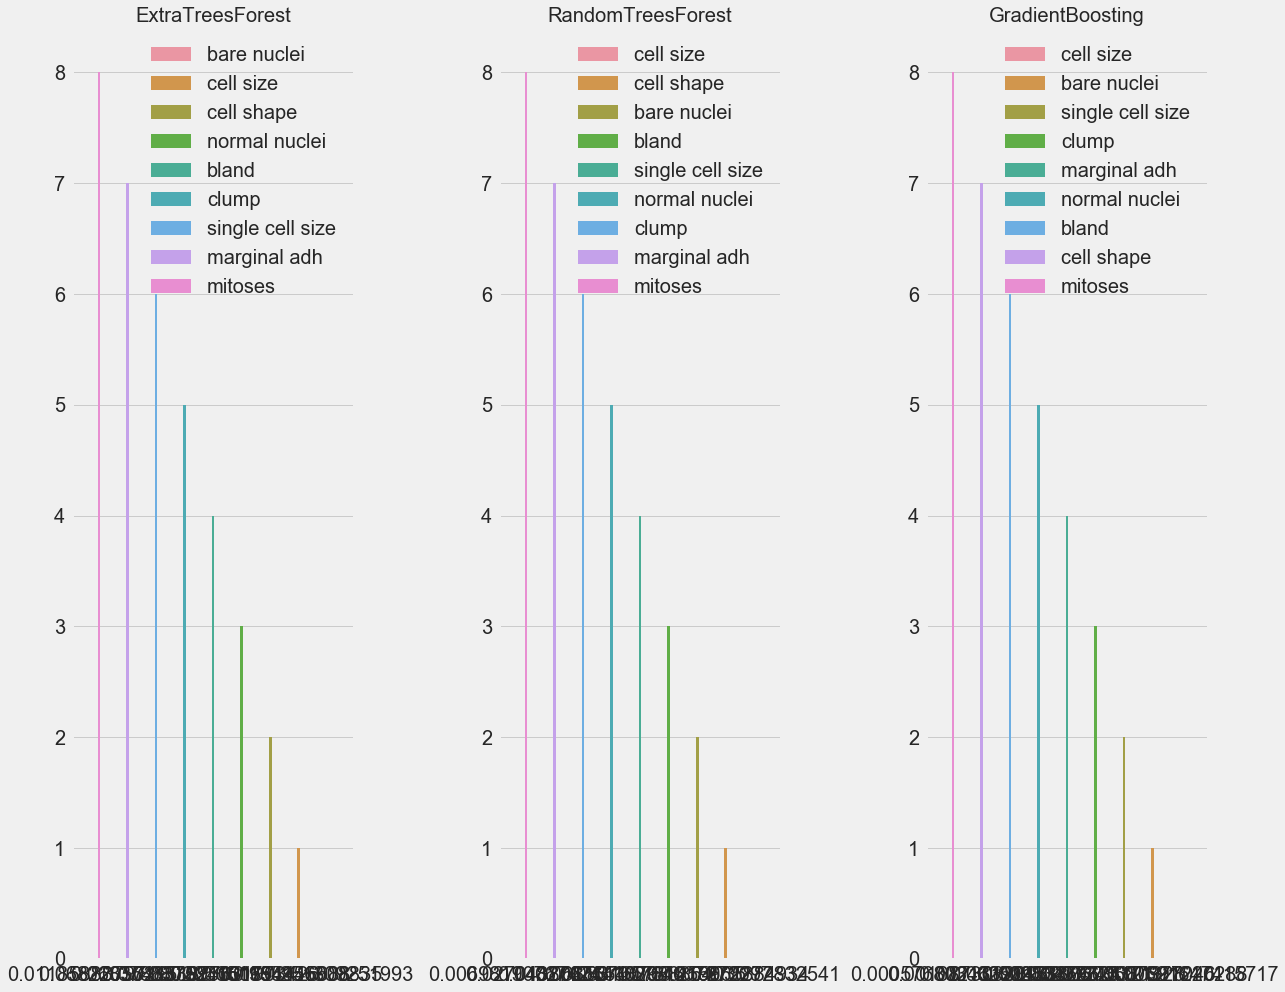

In [38]:
importance(n_estimators=15000)

# Wykrywanie anomalii
1. wykrywanie danych ___niepasujących___
2. często dla danych __nie etykietowanych__
3. "dana _niepasująca_ (_outlier_) to taka, która wyraźnie odstaje od reszty próbki w której wystepują" (Gruber, 1969)
4. zainteresowanie wykrywanie anomalii
  1. algorytmy dopasowywania wzorców były bardzo wrażliwe na dane niepasujace
  2. potem zbudowano lepsze algorytmy pattern recognition
  3. obecnie outliers są interesujące same w sobie
    * opisują niestandardowe zachowania
    * detekcje włamań
    * wykrywanie oszustw (_ang_. fraud)
    * wykrywania wypływania danych w czasie rzeczywistym
    * w zastosowaniach medycznych
    
5. Anomalie
  1. różnią się w typowych ze względu na cechy
  2. są rzadkie wśród danych
  3. rodzaje anomalii
    * __globalne__ ze względu na całą przestrzeń danych
    * __lokalne__ ze względu na pwien podobszar
    * __kontekstowe__ ze względu na wartości innych atrybutów
      * temperatura 20 stopni jest normalna
      * w grudniu będzie jednak anomalią

## Sposoby detekcji
1. __nadzorowane__
  * uczenie zwykłego klasyfikatora
  * niektóre algorytmy niepraktyczne ze względu na __niezbalansowanie__ danych
    * np. drzewa decyzyjne
    * lepsze modele typu sieci neuronowych
2. __semi-nadzorowane__
  * zbiór uczący złożony __tylko__ z danych ___normalnych___
  * anomalie wykrywane przez odstępstwa od modelu
  * typowy przykład uczenia ___jednoklasowego___
    * one-class SVM, autoenkodery
    * modele gęstościowe określające rozkład dla poprawnych przykładów
3. __nienadzorowane__
  * wykrywanie anomalii na podstawie gęstości

## Algorytmy nienadzorowane
1. najbliższych sąsiadów
  * globalne
    * k-NN (k najbliższych sąsiadów)
    * k-tego najbliższego sąsiada
  * lokalne
    * Local Outlier Factor LOF 
    * Connectivity Based Outlier Factor COF
    * Influenced Outlierness INFLO
    * Local Outlier Probability LoOF
    * Local Correlation Integral LOCI
    * Approximate Local Correlation Integral aLOCI
2. klastrowanie
  * globalne
    * Cluster Based Local Outlier Factor CBLOF
  * lokalne
    * Local Denity Cluster Based Outlier Factor LDCOF
    * Clustering Based Multivariate Gaussian Outlier Score CMGOS
3. statystyczne
  * Histogram Based Outlier Score HBOS
4. podprzestrzeni
  * Robust Principal Component Analysis rPCA
  * CMGOS
5. klasyfikatorów
  * one-class SVM

### Algorytmy k-NN
1. nie mylić z klasyfikacją k-NN
  2. dla każdego przykładu obliczana jest szansa bycia anomalią
    * jako średnia z k najbliższych, albo biorąc k-ty
2. trudno określić właściwe k

#### Local Outlier Factor LOF
  1. znaleźć $k$ odległości sąsiadów
    * dla k-tego, więcej odległości jeśli remis
  2. obliczyć średnią odległość $x$ w k-sąsiedztwie __lokalną gęstość__ (_ang_. local   reachability density) LRD
  $$LRD_k(x)=1\big/\left(\frac{\sum_{v\in{}N_k(x)}d_k(x, v)}{\mid N_k(x)\mid}\right)$$
    * $\mid N_\mid=k$ dla k-NN, $\mid N_\mid=1$ dla k-tego NN
      * większe od 1 dla remisów odległości w przypadku k-tego NN
  3. obliczyć współczynnik LOF dla przykładów
  $$LOF(x)=\frac{\sum_{v\in{}N_k(x)}\frac{LRD_k(v)}{LRD_k(x)}}{\mid N_k\mid}$$
    * LOF to frakcja lokalnych gęstości
    * dla normalnych przykładów ma wartość bliską 1.0
4. bardzo istotny jest wybór k
  * zwykle $10<k<50$
  * popularna metodologia ensemble
    1. obliczyć LOF dla różnych k
    2. wziąć maksymalną wartość

#### Inne metody k-NN
1. inne sposoby pomiaru odległości
2. dodatkowe założenia o lokalnych rozkładach 

#### Metody klastrowania
1. wykorzystanie metody klastrowania danych
  * zwykle k-średnich
2. ewaluacja miary izolacji przykładów (anomaly score)
  $$AS(N_k)=\mid N_k\mid\sum_{x\in N_k(x)}d(x,centr(N_k))$$
  gdzie $centr(N_k)$ jest __centroidem klastra__
3. inne metody klastrujace wykorzystują zmodyfikowane miary

### Statystyczne
1. utworzenie histogramu dla każdej cechy
  * założenie niezależności cech
  * nieistotne przy dużej liczbie cech
2. dla każdego przykładu przemnożenie odwrotności wysokości binów do których należą cechy
  * outliers będą miały zwykle __rzadkie__ wartosci cech
3. mniej dokładny, ale bardzo szybki

### One-class SVM
1. zbieranie danych negatywnych wolne, trudne, i niebezpieczne
2. SVM potrafi zbudować __nieliniową__ granicę rozdzielającą
3. SVM rozwiązuje
$$\begin{align}
\underset{\theta, b, \xi_i}{min}\frac{1}{2}\|\theta\|^2&+C\sum_{i=1}^N\xi_i\\
\text{pod warunkami}&\\
y_i(\theta^T\phi(x_i)+b)\geq1-\xi_i&\hskip1em\text{dla}\;i=1,\dots,N\\
\xi_i\geq0&\hskip1em\text{dla}\;i=1,\dots,N
\end{align}$$
dajęc rozwiązanie
$$f(x)=sign\left(\sum_{i=1}^N\alpha_iy_iK(x,x_i)+b\right)$$
4. __jednoklasowe SVM__ (one-class SVM)
$$\begin{align}
\underset{\theta, \xi_i,\rho}{min}\frac{1}{2}\|\theta\|^2&+\frac{1}{\nu N}\sum_{i=1}^N\xi_i-\rho\\
\text{pod warunkami}&\\
(\theta^T\phi(x_i))\geq\rho-\xi_i&\hskip1em\text{dla}\;i=1,\dots,N\\
\xi_i\geq0&\hskip1em\text{dla}\;i=1,\dots,N
\end{align}$$
dając rozwiązanie
$$f(x)=sign\left(\sum_{i=1}^N\alpha_iK(x,x_i)-\rho\right)$$
  * $\nu$ jest __górnym ograniczeniem frakcji outliersów__
  * $\nu$ jest __dolnym ograniczeniem na liczbę support vectors__
  * daje hiperpłasczyznę opisywaną przez $\theta$ i $\rho$ z __maksymalnym__ marginesem od średka układu cech
  
5. inne rozwiązanie one-class SVM buduje sferyczną otoczkę wokół danych

### Isolation forest

2. __izolacja__ anomalii
  1. __losowy__ wybór cechy
  2. __losowy__ wybór punktu podziału pomiędzy minimalną a maksymalną wartością cechy w zbiorze
3. anomalie są __różne__ od innych i jest ich __mało__ (z definicji)
  * ścieżka izolująca anomalie będzie dużo __krótsza__
  * najpierw budowane jest losowe drzewo izolacji
  * następnie kontrolowana długość ścieżki dla przykładów
4. wynik jest bardzo zależny od losowości drzewa
  * trzeba powtórzyć wielokrotnie
  
  
<img src="../mum_figures/isolation_tree.png" width="100%">